<a href="https://www.kaggle.com/code/karnangopalakrishnan/titanic-first-comp?scriptVersionId=114340170" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
tr_data=pd.read_csv('/kaggle/input/titanic/train.csv')
ts_data=pd.read_csv('/kaggle/input/titanic/test.csv')


In [4]:
tr_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**I only intend to take numerical numbers here, therefore I'll remove Name, Ticket, and Cabin. PassengerId has an indux number here, therefore it is no longer helpful. So I'm going to remove these Four columns.**

In [5]:
tr1=tr_data.drop(columns=['Name','Ticket','Cabin','PassengerId'])
ts1=ts_data.drop(columns=['Name','Ticket','Cabin','PassengerId'])

<AxesSubplot:>

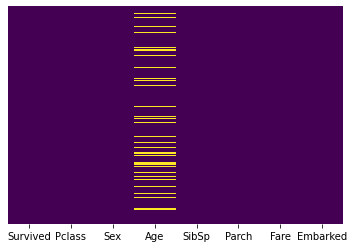

In [6]:
sns.heatmap(tr1.isnull(),yticklabels=False,cbar=False,cmap='viridis' )

To locate the missing values. I discovered that the sex column has missing data.

<AxesSubplot:xlabel='Survived', ylabel='count'>

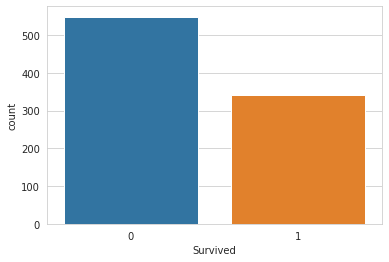

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=tr1)

<AxesSubplot:xlabel='Survived', ylabel='count'>

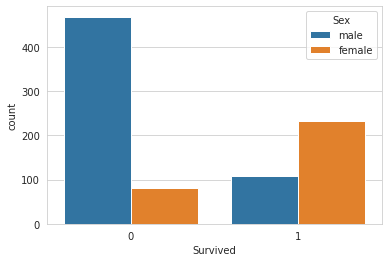

In [8]:
sns.countplot(x='Survived',data=tr1,hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

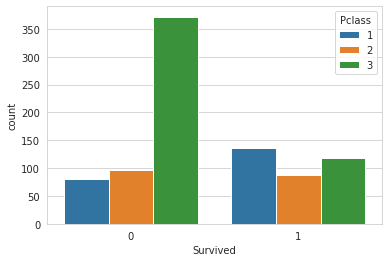

In [9]:
sns.countplot(x='Survived',data=tr1,hue='Pclass')

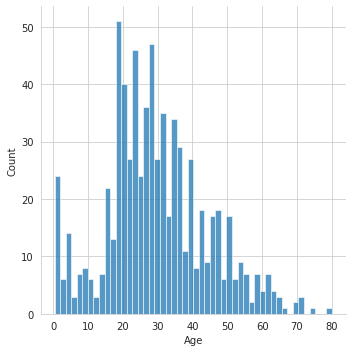

In [10]:
sns.displot(tr1['Age'].dropna(),kde=False,bins=50)


In [11]:
tr1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [12]:
ts1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

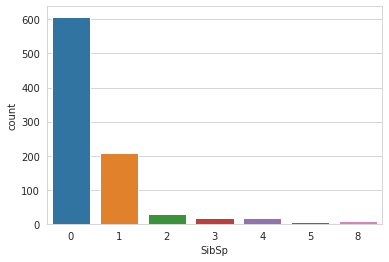

In [13]:
sns.countplot(x='SibSp',data=tr1)

<AxesSubplot:>

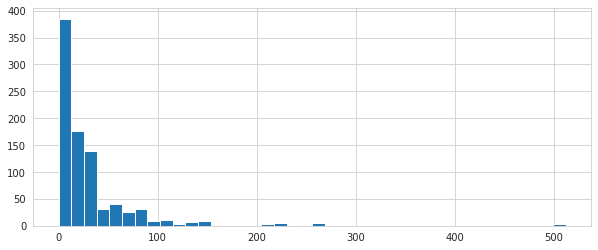

In [14]:
tr1['Fare'].hist(bins=40,figsize=(10,4))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

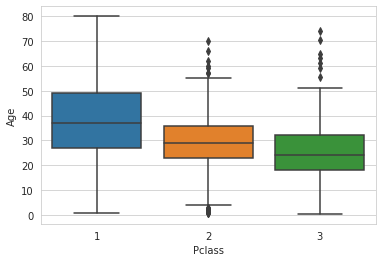

In [15]:

sns.boxplot(x="Pclass", y="Age",data=tr1)

In [16]:
def add_age(col):
    Age=col[0]
    Pclass=col[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 35
        elif Pclass==2:
            return 29
        else:
            return 23
    else: 
        return Age 

In [17]:
ts1['Age']=ts1[['Age','Pclass']].apply(add_age,axis=1)
ts1.Fare=ts1.Fare.fillna(ts1.Fare.median())

<AxesSubplot:>

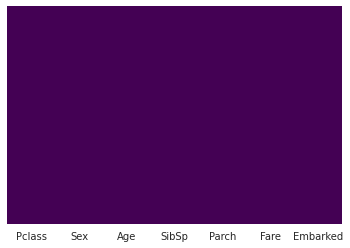

In [18]:
sns.heatmap(ts1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

 *There are no missing values in the test data.*

In [19]:
def add_age(col):
    Age=col[0]
    Pclass=col[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 35
        elif Pclass==2:
            return 29
        else:
            return 23
    else: 
        return Age 
    

In [20]:
tr1['Age']=tr1[['Age','Pclass']].apply(add_age,axis=1)

<AxesSubplot:>

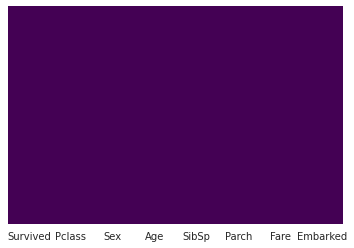

In [21]:
sns.heatmap(tr1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

*There are no missing values in the train data*****.

In [22]:
tr1.dropna(inplace=True)

In [23]:
tr2=tr1.join(pd.get_dummies(tr1[['Sex','Embarked']]))
ts2=pd.get_dummies(ts1,columns=["Embarked","Sex"])

tr1.join(pd.get_dummies(tr1[['Sex','Embarked']]))


In [24]:
tr3=tr2.drop(columns=['Sex','Embarked'])

In [25]:
ts2.Sex_female=ts2.Sex_female.fillna(ts2.Sex_female.median())
ts2.Sex_male=ts2.Sex_male.fillna(ts2.Sex_male.median())
ts2.Embarked_C=ts2.Embarked_C.fillna(ts2.Embarked_C.median())
ts2.Embarked_Q=ts2.Embarked_Q.fillna(ts2.Embarked_Q.median())
ts2.Embarked_S=ts2.Embarked_S.fillna(ts2.Embarked_S.median())

**LogisticRegression**

In [26]:
X=tr3.drop('Survived',axis=1)
Y=tr3['Survived']

In [27]:
from sklearn.model_selection import train_test_split


In [28]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=101)

In [29]:
from sklearn.linear_model import LogisticRegression


In [30]:
logmodel=LogisticRegression()

In [31]:
logmodel.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

LogisticRegression

In [32]:
prediction_log=logmodel.predict(X_test)

In [33]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score 
import sklearn.metrics as metrics

In [34]:
print(classification_report(y_test,prediction_log))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       163
           1       0.84      0.68      0.75       104

    accuracy                           0.82       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.82      0.82       267



In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
confusion_matrix(y_test,prediction_log)

array([[149,  14],
       [ 33,  71]])

In [37]:
a=metrics.classification_report(y_test,prediction_log)
accuracy_lr=metrics.accuracy_score(y_test,prediction_log)
print("Accuracy of the Logistic Regression model is",accuracy_lr)

Accuracy of the Logistic Regression model is 0.8239700374531835


In [38]:
predictions_log=logmodel.predict(ts2)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [39]:
predictions_log

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,

**DecisionTree Classifier**

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
prediction_dt=dt.predict(X_test)

In [41]:
a=metrics.classification_report(y_test,prediction_dt)
accuracy_dt=metrics.accuracy_score(y_test,prediction_dt)
print("Accuracy of the Decision Tree model is",accuracy_dt)

Accuracy of the Decision Tree model is 0.7790262172284644


**Random Forest Classifier**

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
rf.fit(X_train,y_train)
predictions_rf=rf.predict(X_test)

In [43]:
a=metrics.classification_report(y_test,predictions_rf)
accuracy_rf=metrics.accuracy_score(y_test,predictions_rf)
print("Accuracy of the Random Forest model is",accuracy_rf)

Accuracy of the Random Forest model is 0.8277153558052435


**Here, the Randomforest technique outperforms logistic regression and decision trees.**

In [44]:
predictions_rf=rf.predict(ts2)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [45]:
predictions_rf

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,

In [46]:
submission=pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [47]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [48]:
submission["Survived"]=predictions_rf
submission.to_csv("ress.csv",index=False)